# Linear Regression on Medical Price Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Medical Price Dataset.csv')

In [3]:
target = df.charges
inputs = df.drop('charges', axis='columns')

## One-hot encoding for gender and region

In [4]:
dummies = pd.get_dummies(inputs.sex)
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.drop('sex', axis='columns', inplace=True)

In [5]:
dummies1 = pd.get_dummies(inputs.region)
inputs = pd.concat([inputs,dummies1], axis='columns')
inputs.drop('region',axis='columns',inplace=True)
inputs.head()

,age,bmi,children,smoker,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,yes,1,0,0,0,0,1
1,18,33.770,1,no,0,1,0,0,1,0
2,28,33.000,3,no,0,1,0,0,1,0
3,33,22.705,0,no,0,1,0,1,0,0
4,32,28.880,0,no,0,1,0,1,0,0


## Integer encoding for smoker

In [6]:
inputs['smoker'] = inputs['smoker'].apply({'yes': 1, 'no': 0}.get)

In [7]:
target.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Converting data to numpy array

In [8]:
target = target.to_numpy(dtype=np.float64)
inputs = inputs.to_numpy(dtype=np.float64)

## Normalizing Labels

In [9]:
xMin = min(target)
xMax = max(target)
target = (target - xMin)/(xMax - xMin)

## Visualizing Labels

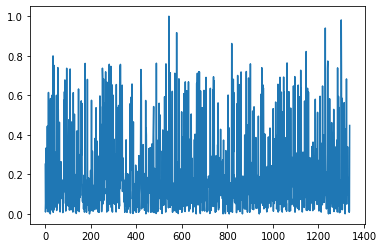

In [10]:
plt.plot(target)
plt.show()

## Linear Regression from Scratch

In [11]:
class LinearRegressionFromScratch():
    def __init__(self):
        self.weights = None
        self.bias = None
        self.X, self.y = None, None
        self.lr = 0.001
        self.iter = 100000
        
    def train(self,X,y):
        samples, features = X.shape
#         self.weights = np.random.rand(features)
        self.weights = np.zeros(features)
        self.bias = 0
        self.X = X
        self.y = y
        samples = float(samples)
#         print(self.weights.shape,X.shape)
        debug = self.iter//10
        for i in range(self.iter):
            y_predict = np.dot(X,self.weights) + self.bias
            
            sigma = 1/(1+np.exp(-y_predict))
            dAct = sigma * (1-sigma)
#             print('mean of activation: {}'.format(np.mean(dAct))) # 10^-8
            dw = (-2/samples)*np.dot(X.T,(y - y_predict)*dAct)
            db = np.mean(-2*(y - y_predict)*dAct)
#             print('mean activation: {}, mean dw: {}, mean weights: {}'.format(np.mean(dAct), np.mean(dw), np.mean(self.weights)))
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
            if i%debug==0:
                print("During iteration: {}, the loss is {}".format(i,self.mse()))
#             print(np.mean(self.weights))
            
    def mse(self):
        y_predict = np.dot(self.X, self.weights) + self.bias
        loss = np.mean(np.square((self.y - y_predict)))
        return loss
    
    def test(self,X_test):
        y_predict = np.dot(X_test,self.weights) + self.bias
        return y_predict
#         converting back to original scale after taking the logarithm of the labels
#         return np.exp(y_predict)


In [12]:
model1 = LinearRegressionFromScratch()
# print(np.mean(inputs),np.mean(target))
model1.train(inputs,target)

During iteration: 0, the loss is 0.037513105871492584
During iteration: 10000, the loss is 0.01485323344713204
During iteration: 20000, the loss is 0.010945454250226201
During iteration: 30000, the loss is 0.00995627486715396
During iteration: 40000, the loss is 0.009634293681564925
During iteration: 50000, the loss is 0.00949522366755701
During iteration: 60000, the loss is 0.009421483780874606
During iteration: 70000, the loss is 0.00937807875157916
During iteration: 80000, the loss is 0.009351329996266264
During iteration: 90000, the loss is 0.009334480169208114


## Linear Regression using sklearn library

In [13]:
model2 = LinearRegression() # from the sklearn library
model2.fit(inputs,target)

LinearRegression()

## Training Regression Metrics

In [18]:

# print(regr.score(inputs, target))
pred1 = model1.test(inputs)
pred2 = model2.predict(inputs)

mse1 = mean_squared_error(target, pred1)
mse2 = mean_squared_error(target, pred2)

print('mean squared error of code from scratch: {}\nmean squared error of sklearn library function: {}'.format(mse1, mse2))

mean squared error of code from scratch: 0.009323717063722163
mean squared error of sklearn library function: 0.009300221313183768
